In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Houseprice_Data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

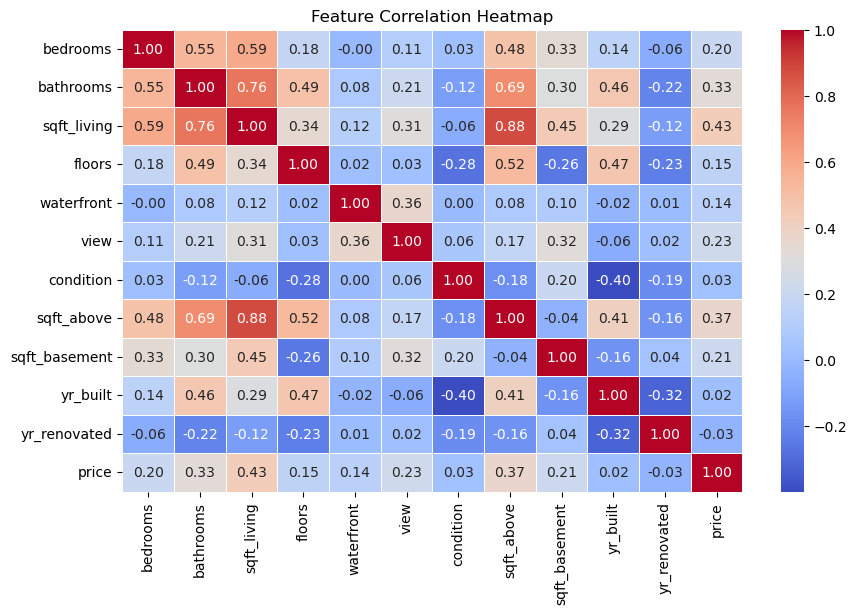

In [7]:
# Select relevant columns
a = df[["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view", 
        "condition", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "price"]]

# Compute correlation matrix
b = a.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(b, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [355]:
df["price"].mean()

527244.7947875602

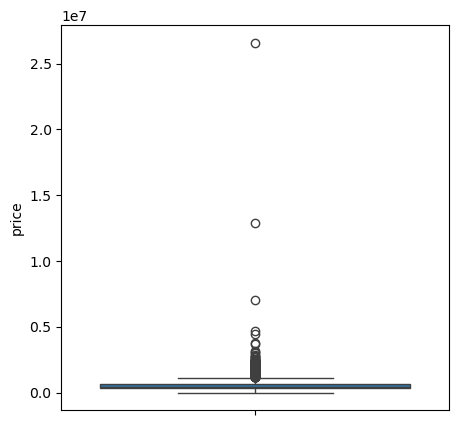

In [9]:
plt.figure(figsize=(5,5))
sns.boxplot(df["price"])
plt.show()

In [119]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df["price"]))
df = df[(z_scores < 3)]  # Keeping data within 3 standard deviations

In [321]:
x = df[["sqft_living", "sqft_above", "bathrooms", "view"]]
y = df["price"]

In [313]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [11]:
df["price"] = df["price"].astype(int)

In [159]:
df.drop(columns=["street", "city","statezip","country", "date","sqft_lot"], inplace=True)

In [173]:
# Define independent (X) and dependent variable (y)
x = df[["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view", "condition", "sqft_above", "sqft_basement", "yr_built", "yr_renovated"]]
y = df["price"]

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [77]:
X_train.shape

(3680, 11)

In [79]:
Y_train.shape

(3680,)

In [81]:
X_test.shape

(920, 11)

In [83]:
Y_test.shape

(920,)

In [33]:
y.head(10)

0     313000
1    2384000
2     342000
3     420000
4     550000
5     490000
6     335000
7     482000
8     452500
9     640000
Name: price, dtype: int32

In [199]:
#model 
from sklearn.linear_model import LinearRegression

In [201]:
lr = LinearRegression()

In [203]:
lr.fit(X_train, Y_train)

LinearRegression()

In [207]:
y_pred = lr.predict(X_test)

In [205]:
y_pred = lr.predict(X_test.iloc[[3]])
y_pred

array([540240.25516304])

In [195]:
print(y_pred.shape)          
print(Y_test.shape)

(1,)
(920,)


In [211]:
from sklearn.metrics import r2_score
print("R2 Score:",r2_score(Y_test, y_pred)*100)

R2 Score: 3.085468060214791
